# Bias Variance Trade Off

Model Evaluation is a fundamental topic of understanding your model’s performance!

## Train Test Split
You will always train a Machine Learning Algorithm onsome data, but afterwards you will want some measure ofhow well it performed.

While you could get these measurements using the same
data you trained your model on, that is not a good idea.

Your model has already seen this data meaning it is not a
good choice for evaluating your model’s performance

You should get these metrics off test data, which your
model has not seen yet.

This is known as a train-test split

## Holdout Data
An expansion of this idea is the holdout data set.

This is separate from the training and test sets.

In this process you use the training data to fit your model,
you use the test set to evaluate and adjust your model.

You can use the test set over and over again.

Finally, before deploying your model, you check it against
the holdout to get some final metrics on performance.

## Bias Variance Trade-Off
![bias-variance](images/bias-variance.png)

# Logistical Regression Theory

We want to learn about Logistic Regression as a method for
Classification

So far we’ve only seen regression problems where we try to
predict a continuous value.

Although the name may be confusing at first, logistic
regression allows us to solve classification problems, where
we are trying to predict discrete categories.

The convention for binary classification is to have two
classes 0 and 1

We can’t use a normal linear regression model on binary
groups. It won’t lead to a good fit. Instead we can transform our linear regression to a logistic regression curve.

![lin-vs-log](images/lin-vs-log.png)

The **Sigmoid (aka Logistic) Function** takes in any value and outputs it to be between 0 and 1.

![sigmoid-func](images/sigmoid-func.png)

This means we can take our Linear Regression Solution and place it into the Sigmoid Function

![lin-in-sig](images/lin-in-sig.png)

We can set a cutoff point at 0.5, anything below it results in class 0, anything above is class 1

After you train a logistic regression model on some training data, you will evaluate your model’s performance on some test data.

You can use a confusion matrix to evaluate classification models.

![confusion matrix](images/confusion.png)

![error-types](images/error-type.png)

**Basic Terminology**
+ True Positives (TP)
+ True Negatives (TN)
+ False Positives (FP)
+ False Negatives (FN)

**Accuracy:**
+ Overall, how often is it correct?
+ (TP + TN) / total n = 150/165 = 0.91

**Misclassification Rate (Error Rate):**
+ Overall, how often is wrong?
+ (FP + FN) / total n = 15/165 = 0.09

# Logisitcal Regression in Python

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Our Data

In [57]:
train = pd.read_csv('titanic_train.csv')

In [58]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Examining Our Data

<AxesSubplot:>

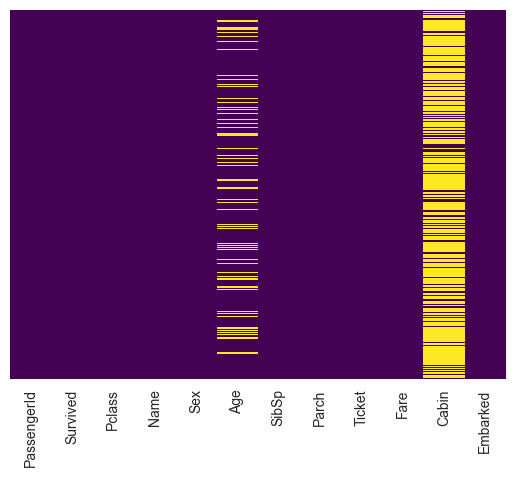

In [59]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [60]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

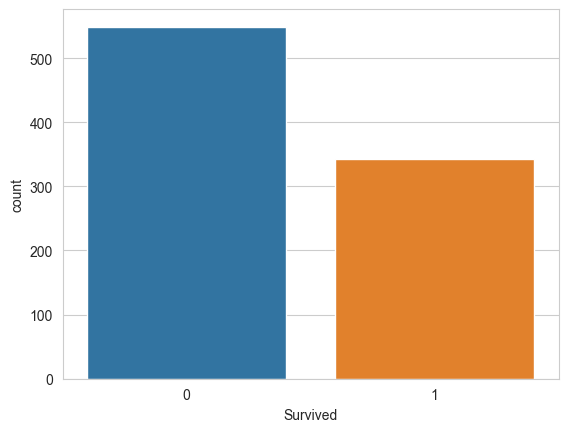

In [61]:
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

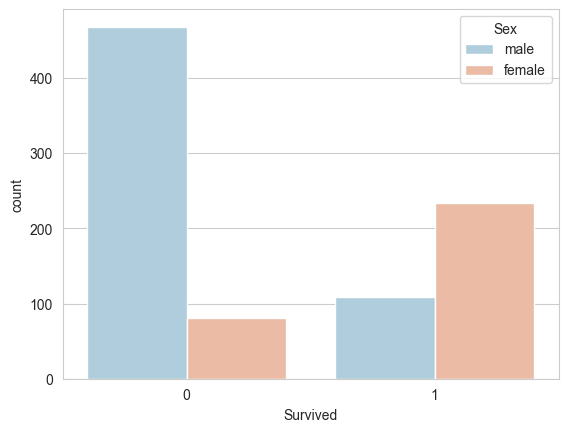

In [62]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

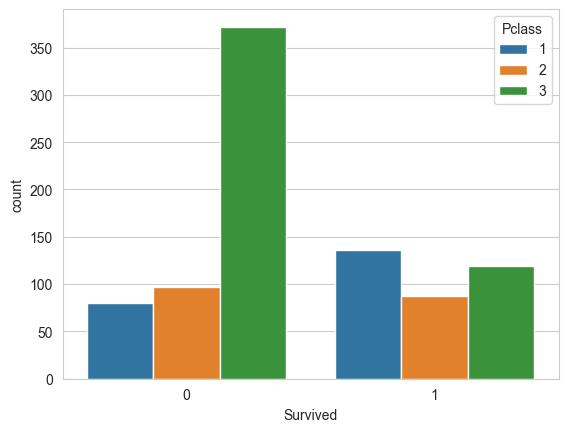

In [63]:
sns.countplot(x='Survived', data=train, hue='Pclass')

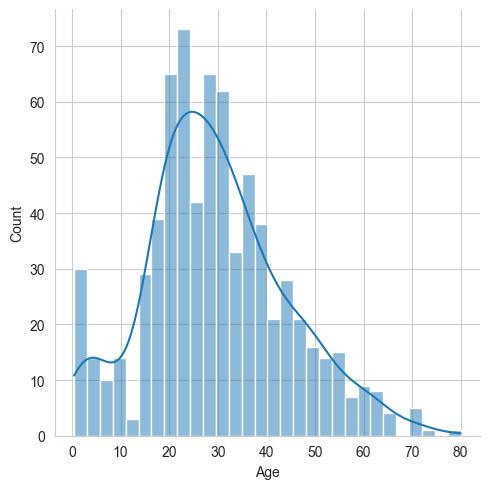

In [64]:
sns.displot(train['Age'].dropna(), kde=True, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

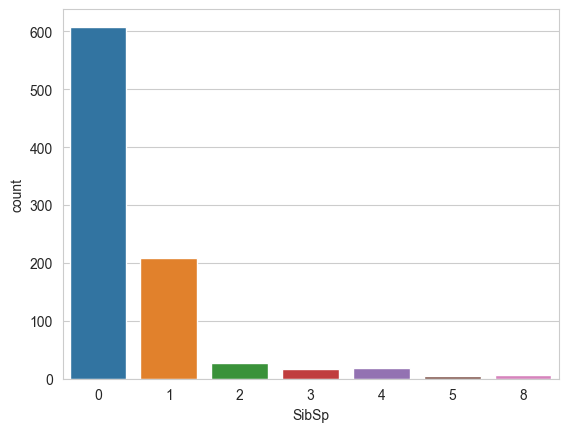

In [65]:
sns.countplot(data=train, x='SibSp')

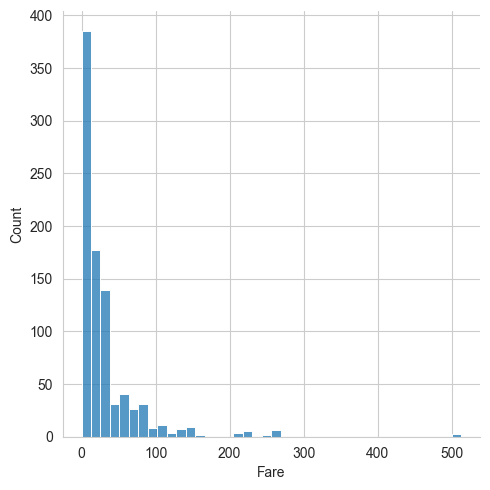

In [66]:
sns.displot(train['Fare'], bins=40)

## Cleaning our data

Because we are not missing too many ages, we can take the average age and fill in our missing ages with it!

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

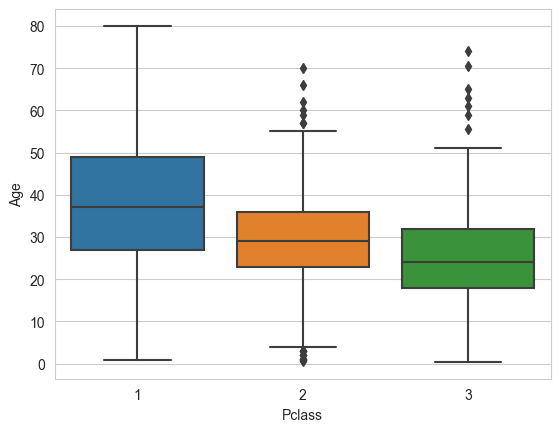

In [67]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [68]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    return Age

In [69]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

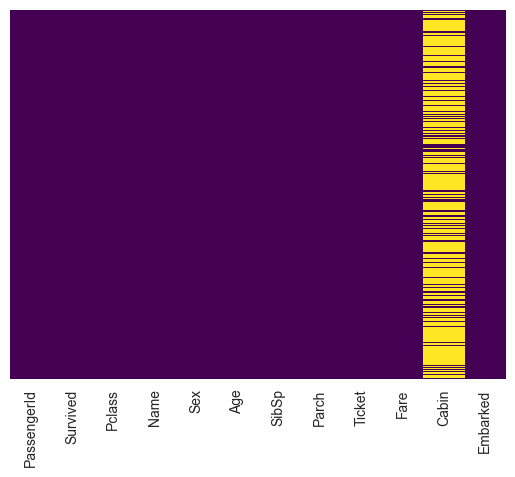

In [71]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Missing so much cabin data we are going to drop the column

In [72]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

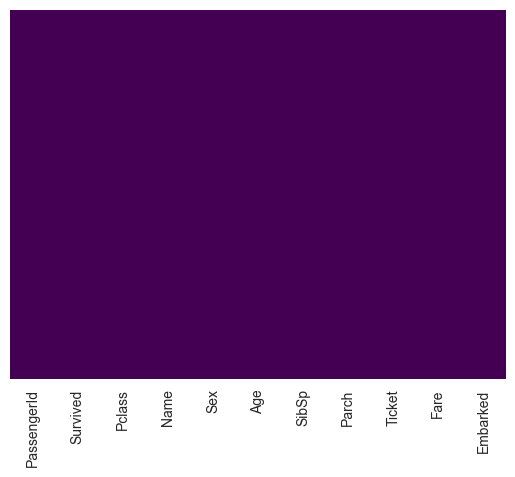

In [73]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [74]:
train.dropna(inplace=True)

## Setting Up Regression Model

### Dummy Variables

A dummy variable is a binary variable that takes a value of 0 or 1, One adds such variables to a regression model to represent factors which are of a binary nature i.e. they are either observed or not observed.

1. For representing a Yes/No property: To indicate whether a data point has a certain property. For example, a dummy variable can be used to indicate whether a car engine is of type ‘Standard’ or ‘Turbo’. Or if a participant in a drug trial belongs to the placebo group or the treatment group.

2. For representing a categorical value: A related use of dummies is to indicate which one of a set of categorical values a data point belongs to. For example, a vehicle’s body style could be one of convertible, hatchback, coupe, sedan, or wagon. In this case, we would add five dummy variables to the data set, one for each of the 5 body styles and we would ‘one hot encode’ this five element vector of dummies. Thus, the vector [0, 1, 0, 0, 0] would represent all hatchbacks in the data set.

3. For representing an ordered categorical value: An extension of the use of dummies to represent categorical data is one where the categories are ordered. Suppose our Automobiles data set contains cars with engines having 2,3,4,5,6,8 or 12 cylinders. Here, we need to also capture the information contained in the ordering. We will soon see how to do this.

[Source](https://towardsdatascience.com/what-are-dummy-variables-and-how-to-use-them-in-a-regression-model-ee43640d573e)

In [75]:
pd.get_dummies(train['Sex']) #Turning categorical variables into dummy or indicator variables

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Because of the nature of this data, if we feed this into our machine leanring algortihm we run into Multicollinearity. Collinearity is a linear association between two explanatory variables. Two variables are perfectly collinear if there is an exact linear relationship between them. This messes up our algorithm because a bunch of columns will be perfect predictors of another column.

In [76]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [77]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [78]:
train = pd.concat([train, sex, embark], axis=1)

In [79]:
# Dropping unused columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


A perfect machine learning dataframe is all numerical

## Training the Model

In [80]:
X = train.drop('Survived', axis=1) # Our features
y = train['Survived'] # What we want to predict

### Splitting the Data

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [103]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)

In [104]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [105]:
y_predict = logmodel.predict(X_test)

### Metrics

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[150,  13],
       [ 32,  72]], dtype=int64)